Installing libraries

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa.display
import os


LOADING THE CSV FILE

In [110]:
speech_df=pd.read_csv("E:/final year project/dataset/speech_emotion_recognisition.csv")
speech_df = speech_df.drop(speech_df.columns[0], axis=1)
speech_df

,Emotion,Filename
0,Angry,1001_DFA_ANG_XX.wav
1,Disgust,1001_DFA_DIS_XX.wav
2,Fear,1001_DFA_FEA_XX.wav
3,Happy,1001_DFA_HAP_XX.wav
4,Neutral,1001_DFA_NEU_XX.wav
...,...,...
8877,Surprised,03-01-08-01-02-02-24.wav
8878,Surprised,03-01-08-02-01-01-24.wav
8879,Surprised,03-01-08-02-01-02-24.wav
8880,Surprised,03-01-08-02-02-01-24.wav


DATA ANALYSIS


COUNTING TOTAL DATA FOR EACH EMOTIONS

In [111]:
speech_df.Emotion.value_counts()

Emotion
Angry        1463
Disgust      1463
Fear         1463
Happy        1463
Sad          1463
Neutral      1183
Calm          192
Surprised     192
Name: count, dtype: int64

In [112]:
speech_df=speech_df[speech_df["Emotion"]!="Calm"]
speech_df=speech_df[speech_df["Emotion"]!="Surprised"] #dropping calm and surprised column due to lack of data

In [113]:
speech_df.Emotion.value_counts()


Emotion
Angry      1463
Disgust    1463
Fear       1463
Happy      1463
Sad        1463
Neutral    1183
Name: count, dtype: int64

VALUE COUNT PLOT

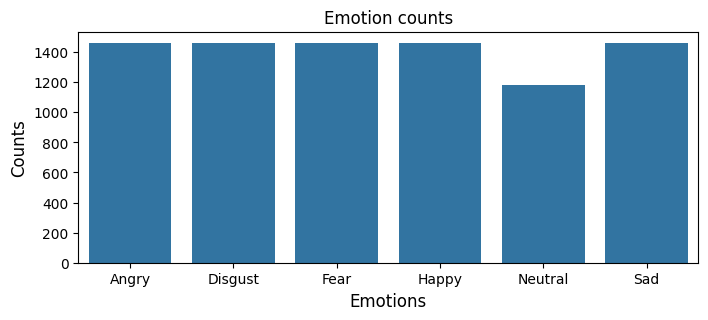

In [114]:
plt.figure(figsize=(8,3))
plt.title("Emotion counts")
sns.countplot(x="Emotion", data=speech_df)
plt.xlabel("Emotions",size=12)
plt.ylabel("Counts",size=12)
plt.show()


In [115]:
# def visualise_waveform(data,sample_rate,emotion):
    
#     plt.title(f"Waveform of {emotion}")
#     librosa.display.waveshow(y=data,sr=sample_rate)
#     plt.ylabel('Amplitude')
    

In [116]:
emotions_list = speech_df['Emotion'].unique().tolist()
emotions_list

['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad']

In [117]:
random_filepaths=speech_df[speech_df['Emotion'].isin(emotions_list)].groupby('Emotion').sample(n=1,random_state=42)
print(random_filepaths)
filenames=random_filepaths['Filename'].to_list()
filenames
# selected_files=dict(zip(random_filepaths['Emotion'],random_filepaths['Filename']))
# print(selected_files)

      Emotion                  Filename
6876    Angry       1085_IEO_ANG_MD.wav
526   Disgust       1007_ITS_DIS_XX.wav
4399     Fear       1054_TSI_FEA_XX.wav
7995    Happy  03-01-03-01-01-02-10.wav
1981  Neutral       1025_ITH_NEU_XX.wav
2200      Sad       1028_DFA_SAD_XX.wav


['1085_IEO_ANG_MD.wav',
 '1007_ITS_DIS_XX.wav',
 '1054_TSI_FEA_XX.wav',
 '03-01-03-01-01-02-10.wav',
 '1025_ITH_NEU_XX.wav',
 '1028_DFA_SAD_XX.wav']

In [118]:
dataset_path="E:/final year project/dataset/"

WAVEFORM PLOT

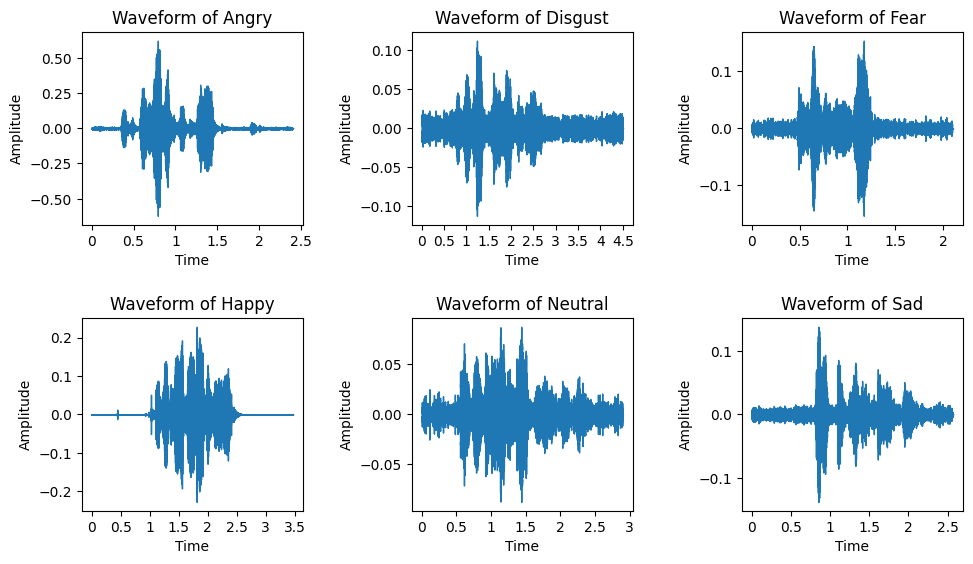

In [119]:

plt.figure(figsize=(10,6))
for i in range(6):
    data,sr=librosa.load(path=os.path.join(dataset_path,emotions_list[i],filenames[i]),sr=16000)
    plt.subplot(2,3,i+1)
    plt.title(f"Waveform of {emotions_list[i]}")
    librosa.display.waveshow(y=data,sr=sr)
    plt.ylabel('Amplitude')
plt.tight_layout(pad=2)
plt.show()

PLOTTING MELSPECTOGRAM

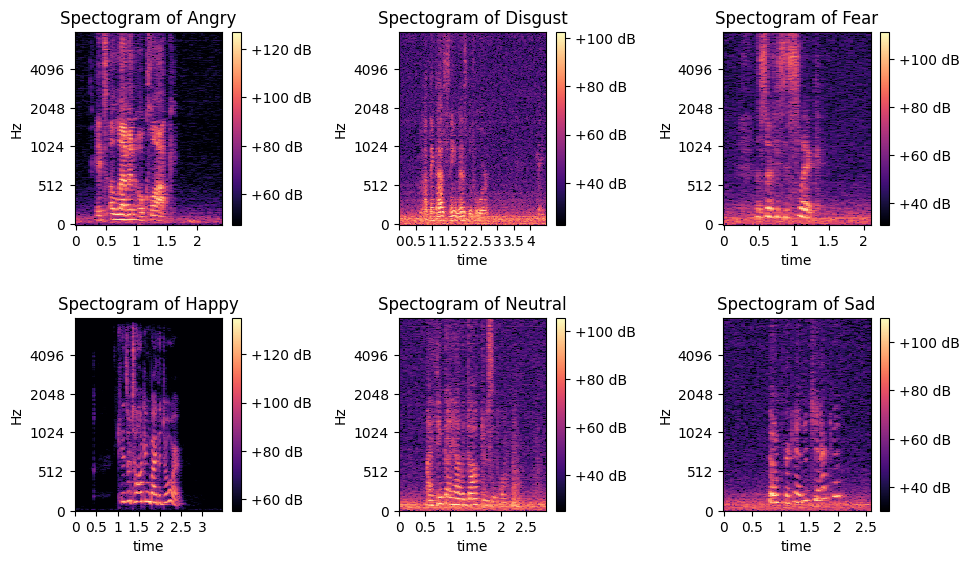

In [120]:
plt.figure(figsize=(10,6))
for i in range(6):
    data,sr=librosa.load(path=os.path.join(dataset_path,emotions_list[i],filenames[i]),sr=16000)
    stft=librosa.stft(data)
    db=librosa.amplitude_to_db(abs(stft),ref=np.min)
    plt.subplot(2,3,i+1)
    plt.title(f"Spectogram of {emotions_list[i]}")
    librosa.display.specshow(data=db,sr=sr,x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')

    plt.xlabel('time')
plt.tight_layout(pad=2)
plt.show()


PLOTTING MFCC

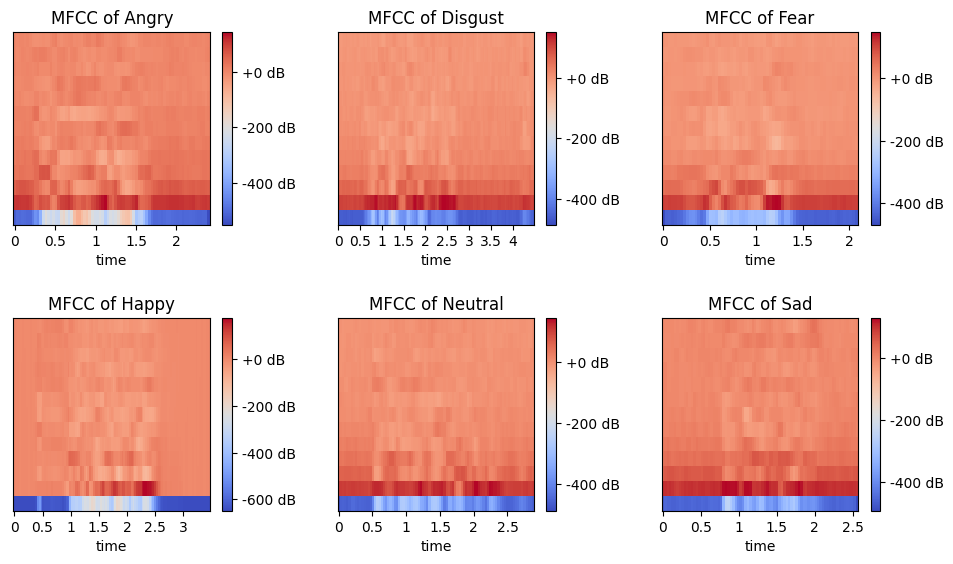

In [121]:
plt.figure(figsize=(10,6))
for i in range(6):
    data,sr=librosa.load(path=os.path.join(dataset_path,emotions_list[i],filenames[i]),sr=16000)
    mfcc=librosa.feature.mfcc(y=data,sr=sr,n_mfcc=13)
    plt.subplot(2,3,i+1)
    plt.title(f"MFCC of {emotions_list[i]}")
    librosa.display.specshow(mfcc,sr=sr,x_axis='time')
    plt.colorbar(format='%+2.0f dB')

    plt.xlabel('time')
plt.tight_layout(pad=2)
plt.show()